In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 3 days

In [ ]:
import pandas as pd
import numpy as np
import pickle

file_path = '/content/drive/My Drive/DataScience/Transformer/all_dec_attention_weights_3days.pkl'

with open(file_path, 'rb') as f:
    loaded_all_dec_attention_weights = pickle.load(f)

In [ ]:
all_dec_attention_weights = loaded_all_dec_attention_weights

In [ ]:
len(all_dec_attention_weights)

50

In [ ]:
sum_attention_weights = None

for layer_key, attention_layer_weights in all_dec_attention_weights[0].items():
    if sum_attention_weights is None:
        sum_attention_weights = attention_layer_weights.clone()  # 创建一个新的变量来存储累积的注意力权重
    else:
        sum_attention_weights += attention_layer_weights

In [ ]:
import torch

average_attention_weights = torch.mean(sum_attention_weights, dim=0)

In [ ]:
average_attention_weights.shape

torch.Size([8, 50, 50])

In [ ]:
total_attention_weights = torch.mean(average_attention_weights, dim=0)

In [ ]:
total_attention_weights.shape

torch.Size([50, 50])

In [ ]:
import torch

def min_max_normalize(matrix):
    min_val = matrix.min()
    max_val = matrix.max()
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix

# 假设你有一个权重矩阵 weight_matrix
normalized_attention_weights = min_max_normalize(total_attention_weights)

In [ ]:
normalized_attention_weights

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5092, 0.4908, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3444, 0.3212, 0.3344,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0151, 0.0139, 0.0145,  ..., 0.0854, 0.0000, 0.0000],
        [0.0149, 0.0136, 0.0141,  ..., 0.0614, 0.0777, 0.0000],
        [0.0144, 0.0130, 0.0134,  ..., 0.0523, 0.0623, 0.0588]],
       device='cuda:0', grad_fn=<DivBackward0>)

<ipython-input-54-3b5ea2e90d0b>:9: RuntimeWarning: divide by zero encountered in log
  attention_map = np.log(attention_map)


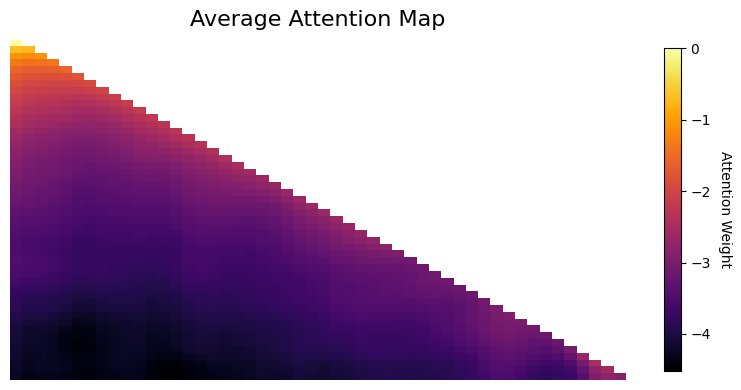

In [ ]:
import matplotlib.pyplot as plt

# Create a subplot for the attention map
fig, ax = plt.subplots(figsize=(8, 4))  # Make the figure square

# Move the attention weights to CPU and convert to NumPy array
attention_map = normalized_attention_weights.cpu().detach().numpy()

attention_map = np.log(attention_map)

# Plot the attention map with a different colormap
im = ax.imshow(attention_map, cmap='inferno', aspect='auto')  # Using 'PuRd' colormap and 'equal' aspect ratio
ax.set_title('Average Attention Map', fontsize=16, pad=10)  # Adjust title font size and padding
ax.axis('off')

# Add a colorbar and adjust its size using the 'shrink' parameter
cbar = fig.colorbar(im, ax=ax, shrink=0.95)  # Adjust the 'shrink' value as needed
cbar.set_label('Attention Weight', rotation=270, labelpad=15)


# Hide x-axis ticks and tick labels
ax.set_xticks([])
ax.set_xticklabels([])

# Show the plot
plt.tight_layout()
plt.show()


#### 30 days

In [ ]:
import pandas as pd
import numpy as np
import pickle

file_path = '/content/drive/My Drive/DataScience/Transformer/all_dec_attention_weights_30days.pkl'

with open(file_path, 'rb') as f:
    loaded_all_dec_attention_weights = pickle.load(f)

In [ ]:
all_dec_attention_weights = loaded_all_dec_attention_weights

In [ ]:
len(all_dec_attention_weights)

50

In [ ]:
sum_attention_weights = None

for layer_key, attention_layer_weights in all_dec_attention_weights[0].items():
    if sum_attention_weights is None:
        sum_attention_weights = attention_layer_weights.clone()  # 创建一个新的变量来存储累积的注意力权重
    else:
        sum_attention_weights += attention_layer_weights

In [ ]:
import torch

average_attention_weights = torch.mean(sum_attention_weights, dim=0)

In [ ]:
average_attention_weights.shape

torch.Size([12, 50, 50])

In [ ]:
total_attention_weights = torch.mean(average_attention_weights, dim=0)

In [ ]:
total_attention_weights.shape

torch.Size([50, 50])

In [ ]:
import torch

def min_max_normalize(matrix):
    min_val = matrix.min()
    max_val = matrix.max()
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix

# 假设你有一个权重矩阵 weight_matrix
normalized_attention_weights = min_max_normalize(total_attention_weights)

In [ ]:
normalized_attention_weights

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5003, 0.4997, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3287, 0.3130, 0.3582,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0116, 0.0122, 0.0123,  ..., 0.0735, 0.0000, 0.0000],
        [0.0107, 0.0113, 0.0114,  ..., 0.0640, 0.0547, 0.0000],
        [0.0111, 0.0114, 0.0115,  ..., 0.0603, 0.0494, 0.0329]],
       device='cuda:0', grad_fn=<DivBackward0>)

<ipython-input-67-fc9a8bb1bd4e>:9: RuntimeWarning: divide by zero encountered in log
  attention_map = np.log(attention_map)


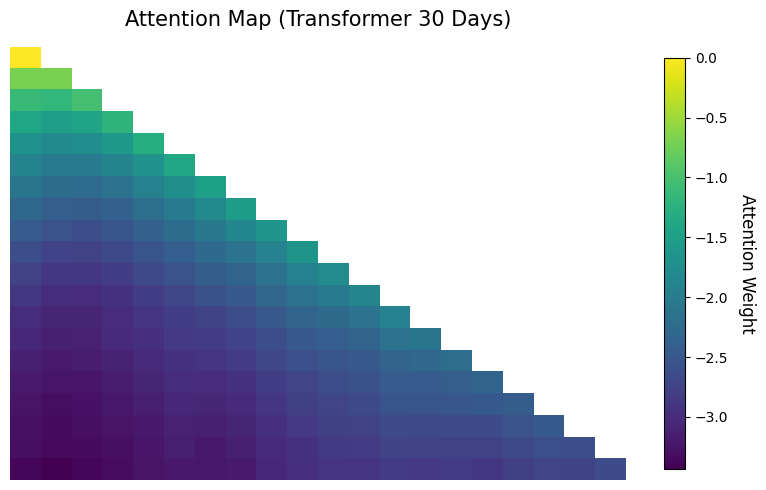

In [ ]:
import matplotlib.pyplot as plt

# Create a subplot for the attention map
fig, ax = plt.subplots(figsize=(8, 5))  # Increase the figure size

# Move the attention weights to CPU and convert to NumPy array
attention_map = normalized_attention_weights[:20,:20].cpu().detach().numpy()

attention_map = np.log(attention_map)

# Plot the attention map with a different colormap
im = ax.imshow(attention_map, cmap='viridis', aspect='auto')  # Using 'PuRd' colormap and 'equal' aspect ratio
ax.set_title('Attention Map (Transformer 30 Days)', fontsize=15, pad=15)  # Adjust title font size and padding
ax.axis('off')

# Add a colorbar and adjust its size using the 'shrink' parameter
cbar = fig.colorbar(im, ax=ax, shrink=0.95)  # Adjust the 'shrink' value as needed
cbar.set_label('Attention Weight', rotation=270, labelpad=20, fontsize=12)  # Increase label font size

# Hide x-axis ticks and tick labels
ax.set_xticks([])
ax.set_xticklabels([])

# Add a white border around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('white')  # Set border color to white

# Set the background color of the plot
ax.set_facecolor('lightgray')

# Show the plot
plt.tight_layout()
plt.show()


#### Energy consumption

In [2]:
import pandas as pd
import numpy as np
import pickle

file_path = '/content/drive/My Drive/DataScience/Transformer/all_dec_attention_weights_EC.pkl'

with open(file_path, 'rb') as f:
    loaded_all_dec_attention_weights = pickle.load(f)

In [3]:
all_dec_attention_weights = loaded_all_dec_attention_weights

In [4]:
len(all_dec_attention_weights)

50

In [5]:
sum_attention_weights = None

for layer_key, attention_layer_weights in all_dec_attention_weights[0].items():
    if sum_attention_weights is None:
        sum_attention_weights = attention_layer_weights.clone()  # 创建一个新的变量来存储累积的注意力权重
    else:
        sum_attention_weights += attention_layer_weights

In [6]:
import torch

average_attention_weights = torch.mean(sum_attention_weights, dim=0)

In [7]:
average_attention_weights.shape

torch.Size([6, 50, 50])

In [8]:
total_attention_weights = torch.mean(average_attention_weights, dim=0)

In [9]:
total_attention_weights.shape

torch.Size([50, 50])

In [10]:
import torch

def min_max_normalize(matrix):
    min_val = matrix.min()
    max_val = matrix.max()
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix

# 假设你有一个权重矩阵 weight_matrix
normalized_attention_weights = min_max_normalize(total_attention_weights)

In [11]:
normalized_attention_weights

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4996, 0.5004, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3419, 0.3197, 0.3384,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0273, 0.0250, 0.0251,  ..., 0.0288, 0.0000, 0.0000],
        [0.0270, 0.0248, 0.0249,  ..., 0.0272, 0.0279, 0.0000],
        [0.0265, 0.0244, 0.0246,  ..., 0.0258, 0.0264, 0.0271]],
       device='cuda:0', grad_fn=<DivBackward0>)

<ipython-input-13-45fa9f051a90>:9: RuntimeWarning: divide by zero encountered in log
  attention_map = np.log(attention_map)


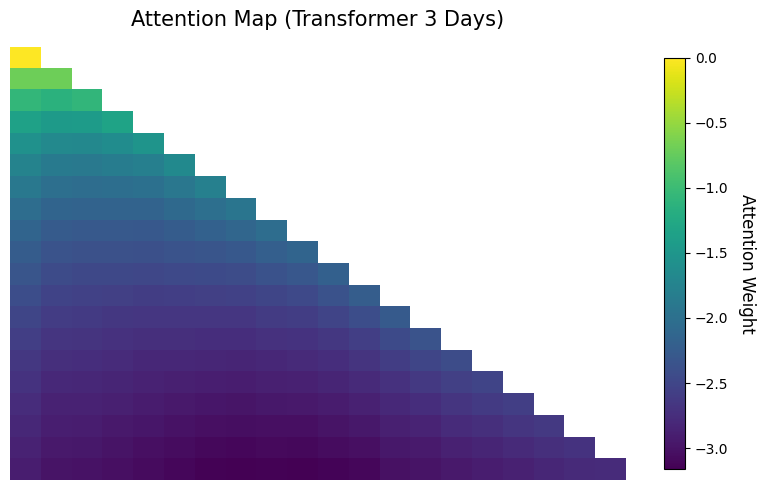

In [13]:
import matplotlib.pyplot as plt

# Create a subplot for the attention map
fig, ax = plt.subplots(figsize=(8, 5))  # Increase the figure size

# Move the attention weights to CPU and convert to NumPy array
attention_map = normalized_attention_weights[:20,:20].cpu().detach().numpy()

attention_map = np.log(attention_map)

# Plot the attention map with a different colormap
im = ax.imshow(attention_map, cmap='viridis', aspect='auto')  # Using 'PuRd' colormap and 'equal' aspect ratio
ax.set_title('Attention Map (Transformer 3 Days)', fontsize=15, pad=15)  # Adjust title font size and padding
ax.axis('off')

# Add a colorbar and adjust its size using the 'shrink' parameter
cbar = fig.colorbar(im, ax=ax, shrink=0.95)  # Adjust the 'shrink' value as needed
cbar.set_label('Attention Weight', rotation=270, labelpad=20, fontsize=12)  # Increase label font size

# Hide x-axis ticks and tick labels
ax.set_xticks([])
ax.set_xticklabels([])

# Add a white border around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('white')  # Set border color to white

# Set the background color of the plot
ax.set_facecolor('lightgray')

# Show the plot
plt.tight_layout()
plt.show()
